In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 


borders = pd.read_csv('GEODATASOURCE-COUNTRY-BORDERS.csv')
data15 = pd.read_csv('2015.csv')
data16 = pd.read_csv('2016.csv')
data17 = pd.read_csv('2017.csv')
three_data_year = pd.read_csv('Three-Year-Data.csv')

In [2]:
# three_data_year.groupBy('Country')

In [3]:
three_year_data = pd.read_csv('Three-Year-Data.csv')
data15_region_subset = data15.loc[:,['Region','Country']]

In [4]:
three_data_year = three_data_year.merge(data15_region_subset, how='inner',left_on='Country Name',right_on='Country')
three_data_year = three_data_year.drop(['Country'], axis=1)
# three_data_year = three_data_year[three_data_year['Country Name'],three_data_year[]]
three_data_year_2015 = three_data_year.loc[:,['Country Name','Region','Country Border Name','Happiness Score 2015']]

In [5]:
three_data_year_2015.drop_duplicates(subset='Country Border Name')

,Country Name,Region,Country Border Name,Happiness Score 2015
0,United Arab Emirates,Middle East and Northern Africa,Oman,6.853
1,United Arab Emirates,Middle East and Northern Africa,Saudi Arabia,6.411
2,Afghanistan,Southern Asia,China,5.140
3,Afghanistan,Southern Asia,Iran,4.686
4,Afghanistan,Southern Asia,Pakistan,5.194
...,...,...,...,...
401,Romania,Central and Eastern Europe,Moldova,5.889
420,Saudi Arabia,Middle East and Northern Africa,Qatar,6.611
499,United States,North America,Canada,7.427
516,South Africa,Sub-Saharan Africa,Botswana,4.332


In [6]:
# groupby_region = three_data_year_2015.groupby('Country Name')['Region'].count().reset_index()
group_region = three_data_year_2015.groupby(['Region','Country Name']).count().reset_index()
group_happiness = three_data_year_2015.groupby(['Country Name','Happiness Score 2015']).count().reset_index()


def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

merged_group_region = group_region.merge(three_data_year_2015, how='inner',left_on='Country Name',right_on='Country Border Name')
merged_group_region = merged_group_region.drop(['Country Name_y','Region_y','Country Border Name_y','Happiness Score 2015_x'],axis=1)
merged_group_region = merged_group_region.rename(columns={'Happiness Score 2015_y':'Happiness Score 2015','Country Border Name_x':'Country Border Name','Country Name_x':'Country Name','Region_x':'Region'})
# DO NOT NEED merged_group_region anymore, use country_and_score

merged_group_region = merged_group_region.rename(columns={'Country Border Name':'Number of Neighbors'})
merged_group_region = merged_group_region.drop_duplicates(subset='Country Name')
merged_group_region['intercept'] = 1
print_full(merged_group_region)




                              Region              Country Name  \
0         Central and Eastern Europe                   Albania   
4         Central and Eastern Europe                   Armenia   
8         Central and Eastern Europe                Azerbaijan   
12        Central and Eastern Europe                   Belarus   
16        Central and Eastern Europe    Bosnia and Herzegovina   
19        Central and Eastern Europe                  Bulgaria   
24        Central and Eastern Europe                   Croatia   
29        Central and Eastern Europe            Czech Republic   
33        Central and Eastern Europe                   Estonia   
34        Central and Eastern Europe                   Georgia   
37        Central and Eastern Europe                   Hungary   
44        Central and Eastern Europe                Kazakhstan   
48        Central and Eastern Europe                Kyrgyzstan   
52        Central and Eastern Europe                    Latvia   
55        

In [7]:
central_and_eastern_europe = merged_group_region[merged_group_region['Region'] == 'Central and Eastern Europe']
eastern_asia = merged_group_region[merged_group_region['Region'] == 'Eastern Asia']
latin_america_and_caribbean = merged_group_region[merged_group_region['Region'] == 'Latin America and Caribbean']
middle_east_and_northern_africa = merged_group_region[merged_group_region['Region'] == 'Middle East and Northern Africa']
north_america = merged_group_region[merged_group_region['Region'] == 'North America']
southeastern_asia = merged_group_region[merged_group_region['Region'] == 'Southeastern Asia']
southern_asia = merged_group_region[merged_group_region['Region'] == 'Southern Asia']
subsaharan_africa = merged_group_region[merged_group_region['Region'] == 'Sub-Saharan Africa']
western_europe = merged_group_region[merged_group_region['Region'] == 'Western Europe']

southern_asia



,Region,Country Name,Number of Neighbors,Happiness Score 2015,intercept
286,Southern Asia,Afghanistan,6,3.575,1
292,Southern Asia,Bangladesh,2,4.694,1
294,Southern Asia,Bhutan,2,5.253,1
296,Southern Asia,India,6,4.565,1
302,Southern Asia,Nepal,2,4.514,1
304,Southern Asia,Pakistan,4,5.194,1


In [8]:
# q1 = (subsaharan_africa.count()/2)[0].astype(int)
# h1 = western_europe.iloc[:6,:]
# h2 = subsaharan_africa.iloc[q1:,:]
# sample = subsaharan_africa.sample()
# X_train, X_test, y_train, y_test = train_test_split(eastern_asia['Happiness Score 2015'],eastern_asia['Happiness Score 2015'])

# X_train = np.stack(X_train, axis=-1)
# y_train = np.stack(y_train)
# X_train = X_train.reshape(-1,1)
# y_train = y_train.reshape(-1,1)

# X_test = np.stack(X_test, axis=-1)
# y_test = np.stack(y_test)
# X_test = X_test.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

# model = LinearRegression()
# model.fit(X_train, y_train)
# model.score(X_test,y_test)
# X_train
# y_train
# X_test
# y_test




                             OLS Regression Results                             
Dep. Variable:     Happiness Score 2015   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.074
Method:                   Least Squares   F-statistic:                     11.61
Date:                  Sat, 30 Nov 2019   Prob (F-statistic):           0.000874
Time:                          18:31:55   Log-Likelihood:                -199.72
No. Observations:                   133   AIC:                             403.4
Df Residuals:                       131   BIC:                             409.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Number of Neig

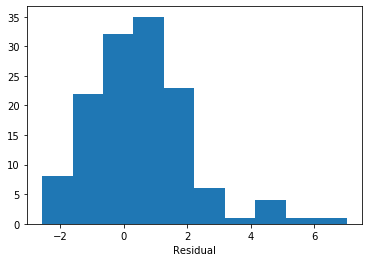

In [9]:
# Compare number of neighbors and happiness score and find correlation between them
# ttest = stats.ttest_ind(southern_asia['Happiness Score 2015'],southern_asia['Country Border Name'])
# ttest.pvalue

reg = stats.linregress(merged_group_region['Happiness Score 2015'],merged_group_region['Number of Neighbors'])
result = sm.OLS(merged_group_region['Happiness Score 2015'],merged_group_region[['Number of Neighbors','intercept']]).fit()
print(result.summary())


residuals = merged_group_region['Happiness Score 2015'] - (reg.slope*merged_group_region['Number of Neighbors'] + reg.intercept)
plt.hist(residuals)
plt.xlabel('Residual')
# plt.ylabel('')



